In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day1/Glass.csv")
le = LabelEncoder()
y = le.fit_transform(df["Type"])
X = df.drop("Type", axis = 1)
le.classes_

array(['building_windows_float_processed',
       'building_windows_non_float_processed', 'containers', 'headlamps',
       'tableware', 'vehicle_windows_float_processed'], dtype=object)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=24, stratify=y)

kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state=24)

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


<Axes: xlabel='tsne0', ylabel='tsne1'>

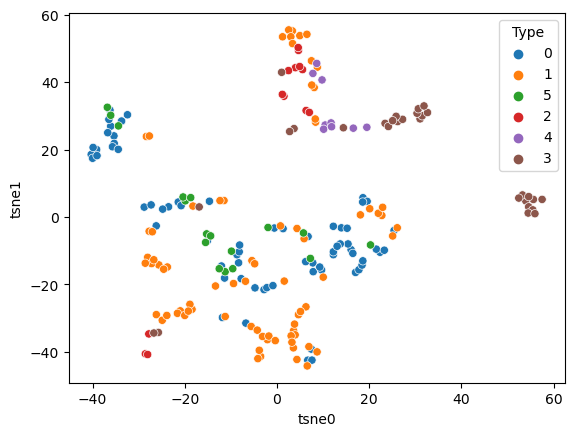

In [4]:
#tsne- used for exploring high-dimensional data
tsne = TSNE(n_components = 2, random_state = 24, perplexity = 6).set_output(transform = "pandas")
em_tsne = tsne.fit_transform(X)

em_tsne['Type'] = le.fit_transform(df['Type'])
em_tsne['Type'] = em_tsne['Type'].astype(str)
sns.scatterplot(data = em_tsne, x = 'tsne0', y = 'tsne1', hue = 'Type')

In [5]:
#tsne using logisticRegression
lr = LogisticRegression()
params = {}
gcv = GridSearchCV(lr, param_grid = params, cv = kfold, scoring = 'neg_log_loss')
gcv.fit(em_tsne, y)
print(gcv.best_score_)
print(gcv.best_params_)

-0.337583247635304
{}


C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le